In [31]:
import sympy as sym 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks
from IPython.display import display , Math

The critical points are: [-1.  1.] [0.]


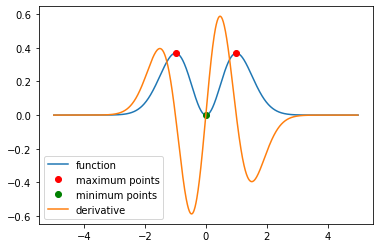

In [6]:
#EMPIRICAL METHOD 

#Parameters and Function
x = np.linspace(-5,5,1001) 
fx = x**2 * np.exp(-x**2)
dfx = np.diff(fx)/(x[1]-x[0])

#LOCAL EXTREME POINTS 
localmax = find_peaks(fx)[0] #returns a tuple with two values, [0] = an array and [1] = an empty dictionary
#                             you will only need the [0]th value, the dictionary is not needed. 

#to calculate the local min you just make the function negative in find_peaks 
localmin = find_peaks(-fx)[0]

print('The critical points are: ' + str(x[localmax]) + ' '+  str(x[localmin]))
#Note: The values given in find_peaks are indices so in the above print you are indexing x in light of these

#Plotting 
plt.plot(x,fx, label = 'function')
plt.plot(x[localmax],fx[localmax],'ro',label = 'maximum points')
plt.plot(x[localmin],fx[localmin],'go',label = 'minimum points')
plt.plot(x[0:-1],dfx, label = 'derivative')
plt.legend()
plt.show()

In [8]:
#ANALYTIC/SYMBOLIC METHOD 
x = sym.symbols('x') 
fx = x**2 * sym.exp(-x**2) 

dfx = sym.diff(fx) 
critpoints = sym.solve(dfx) 
critpoints

[-1, 0, 1]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

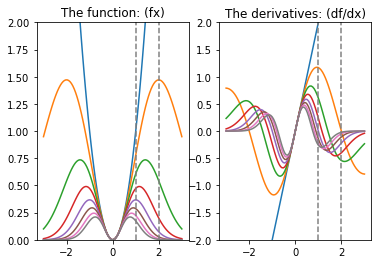

In [47]:
#EXERCISE 
a,x = sym.symbols('a,x')

base_expression = x**2 *sym.exp(-a*x**2)
arange = np.arange(0,2,.25) 
xrange = np.linspace(-3,3,100) 


#set up the figure 
fig,ax = plt.subplots(1,2)

#loop over range for a 
for ai in arange: 
    fx = base_expression.subs(a,ai) 
    dfx = sym.diff(fx)
    critpnts = sym.solve(dfx) 

    #plotting
    ax[0].plot(xrange,sym.lambdify(x,fx)(xrange))
    ax[1].plot(xrange,sym.lambdify(x,dfx)(xrange))
    
    #Test for the critical points 
    if 1 in critpnts: 
        display(Math("\\Rightarrow %s \\text{has a critical point at  }x = 1.\\text{ Wohooo!!!} "\
                     %(sym.latex(fx))))
        
    elif 2 in critpnts: 
         display(Math("\\Rightarrow %s \\text{has a critical point at  }x = 2. \\text{ Wohooo!!!} "\
                      %(sym.latex(fx))))
            
    else: 
        display(Math("\\quad %s \\text{has NO critical point at x = 1 or x = 2  :(} " %(sym.latex(fx))))
        
    
ax[0].set_ylim([0,2])
ax[0].set_title('The function: (fx)')
ax[0].plot([1,1],[0,2],'--',color = 'gray')
ax[0].plot([2,2],[0,2],'--',color = 'gray')

ax[1].set_ylim([-2,2])
ax[1].set_title('The derivatives: (df/dx)')
ax[1].plot([1,1],[-2,2],'--',color = 'gray')
ax[1].plot([2,2],[-2,2],'--',color = 'gray')
